## Лабараторна робота №1
### Хохлов Валерій КН-222Б
### Тема: Дослідження та візуалізація даних за допомогою Python.
### Мета: Отримати базові навики використання Python для дослідження та візуалізації даних.

### 0. Визначення варіанту

In [61]:
N = ord("V") % 3 + 1

In [62]:
print(N)

3


### 1. Створіть функцію, яка приймає назву файлу та назву стовпця як параметр та повертає масив numpy зі значеннями стовпця. 

In [63]:
import csv
import numpy as np

def get_column_values(file_name, col_name):
    with open(file_name, 'r') as f:
        reader = csv.DictReader(f)
        if col_name not in reader.fieldnames:
            raise ValueError(f"Стовпець '{col_name}' відсутній у файлі.")
        
        column_data = [float(row[col_name]) for row in reader]
    return np.array(column_data)

### 2. Використовуючи функцію з попереднього завдання, створіть масив numpy зі значень стовпця «APC» (Armored personnel carrier). 

In [64]:
apc_losses = get_column_values('russia_losses_equipment.csv', 'APC')
print(apc_losses)


[19209. 19192. 19156. ...   706.   706.   516.]


### 3. Знайдіть добові втрати БТР.

In [65]:
def calculate_daily_losses(data):
    reversed_data = np.flip(data)
    daily_losses = np.diff(reversed_data, prepend=reversed_data[0])
    return daily_losses

daily_losses_data = calculate_daily_losses(apc_losses)
print(daily_losses_data)


[  0. 190.   0. ...  13.  36.  17.]


### 4. Знайдіть 5 найбільших добових втрат БТР.

In [66]:
def top_daily_losses(daily_data, top_n=5):
    return sorted(daily_data)[-top_n:]

print(top_daily_losses(daily_losses_data))


[91.0, 96.0, 110.0, 120.0, 190.0]


### 5. Визначте, скільки БТР було знищено влітку 2023 року. 

In [67]:
def calculate_summer_losses(data):
    reversed_data = np.flip(data)
    summer_loss = reversed_data[552] - reversed_data[461]
    return summer_loss

print(calculate_summer_losses(apc_losses))


1126.0


### 6. Знайдіть середнє значення знищених БТР за 100-500 днів війни. 

In [68]:
def average_losses_in_period(data, start=99, end=499):
    return np.mean(data[start:end])

print(average_losses_in_period(daily_losses_data))


11.4675


### 7. Створіть графік втрат БТР за останні 200 днів (починаючи з останньої дати в наборі даних) 

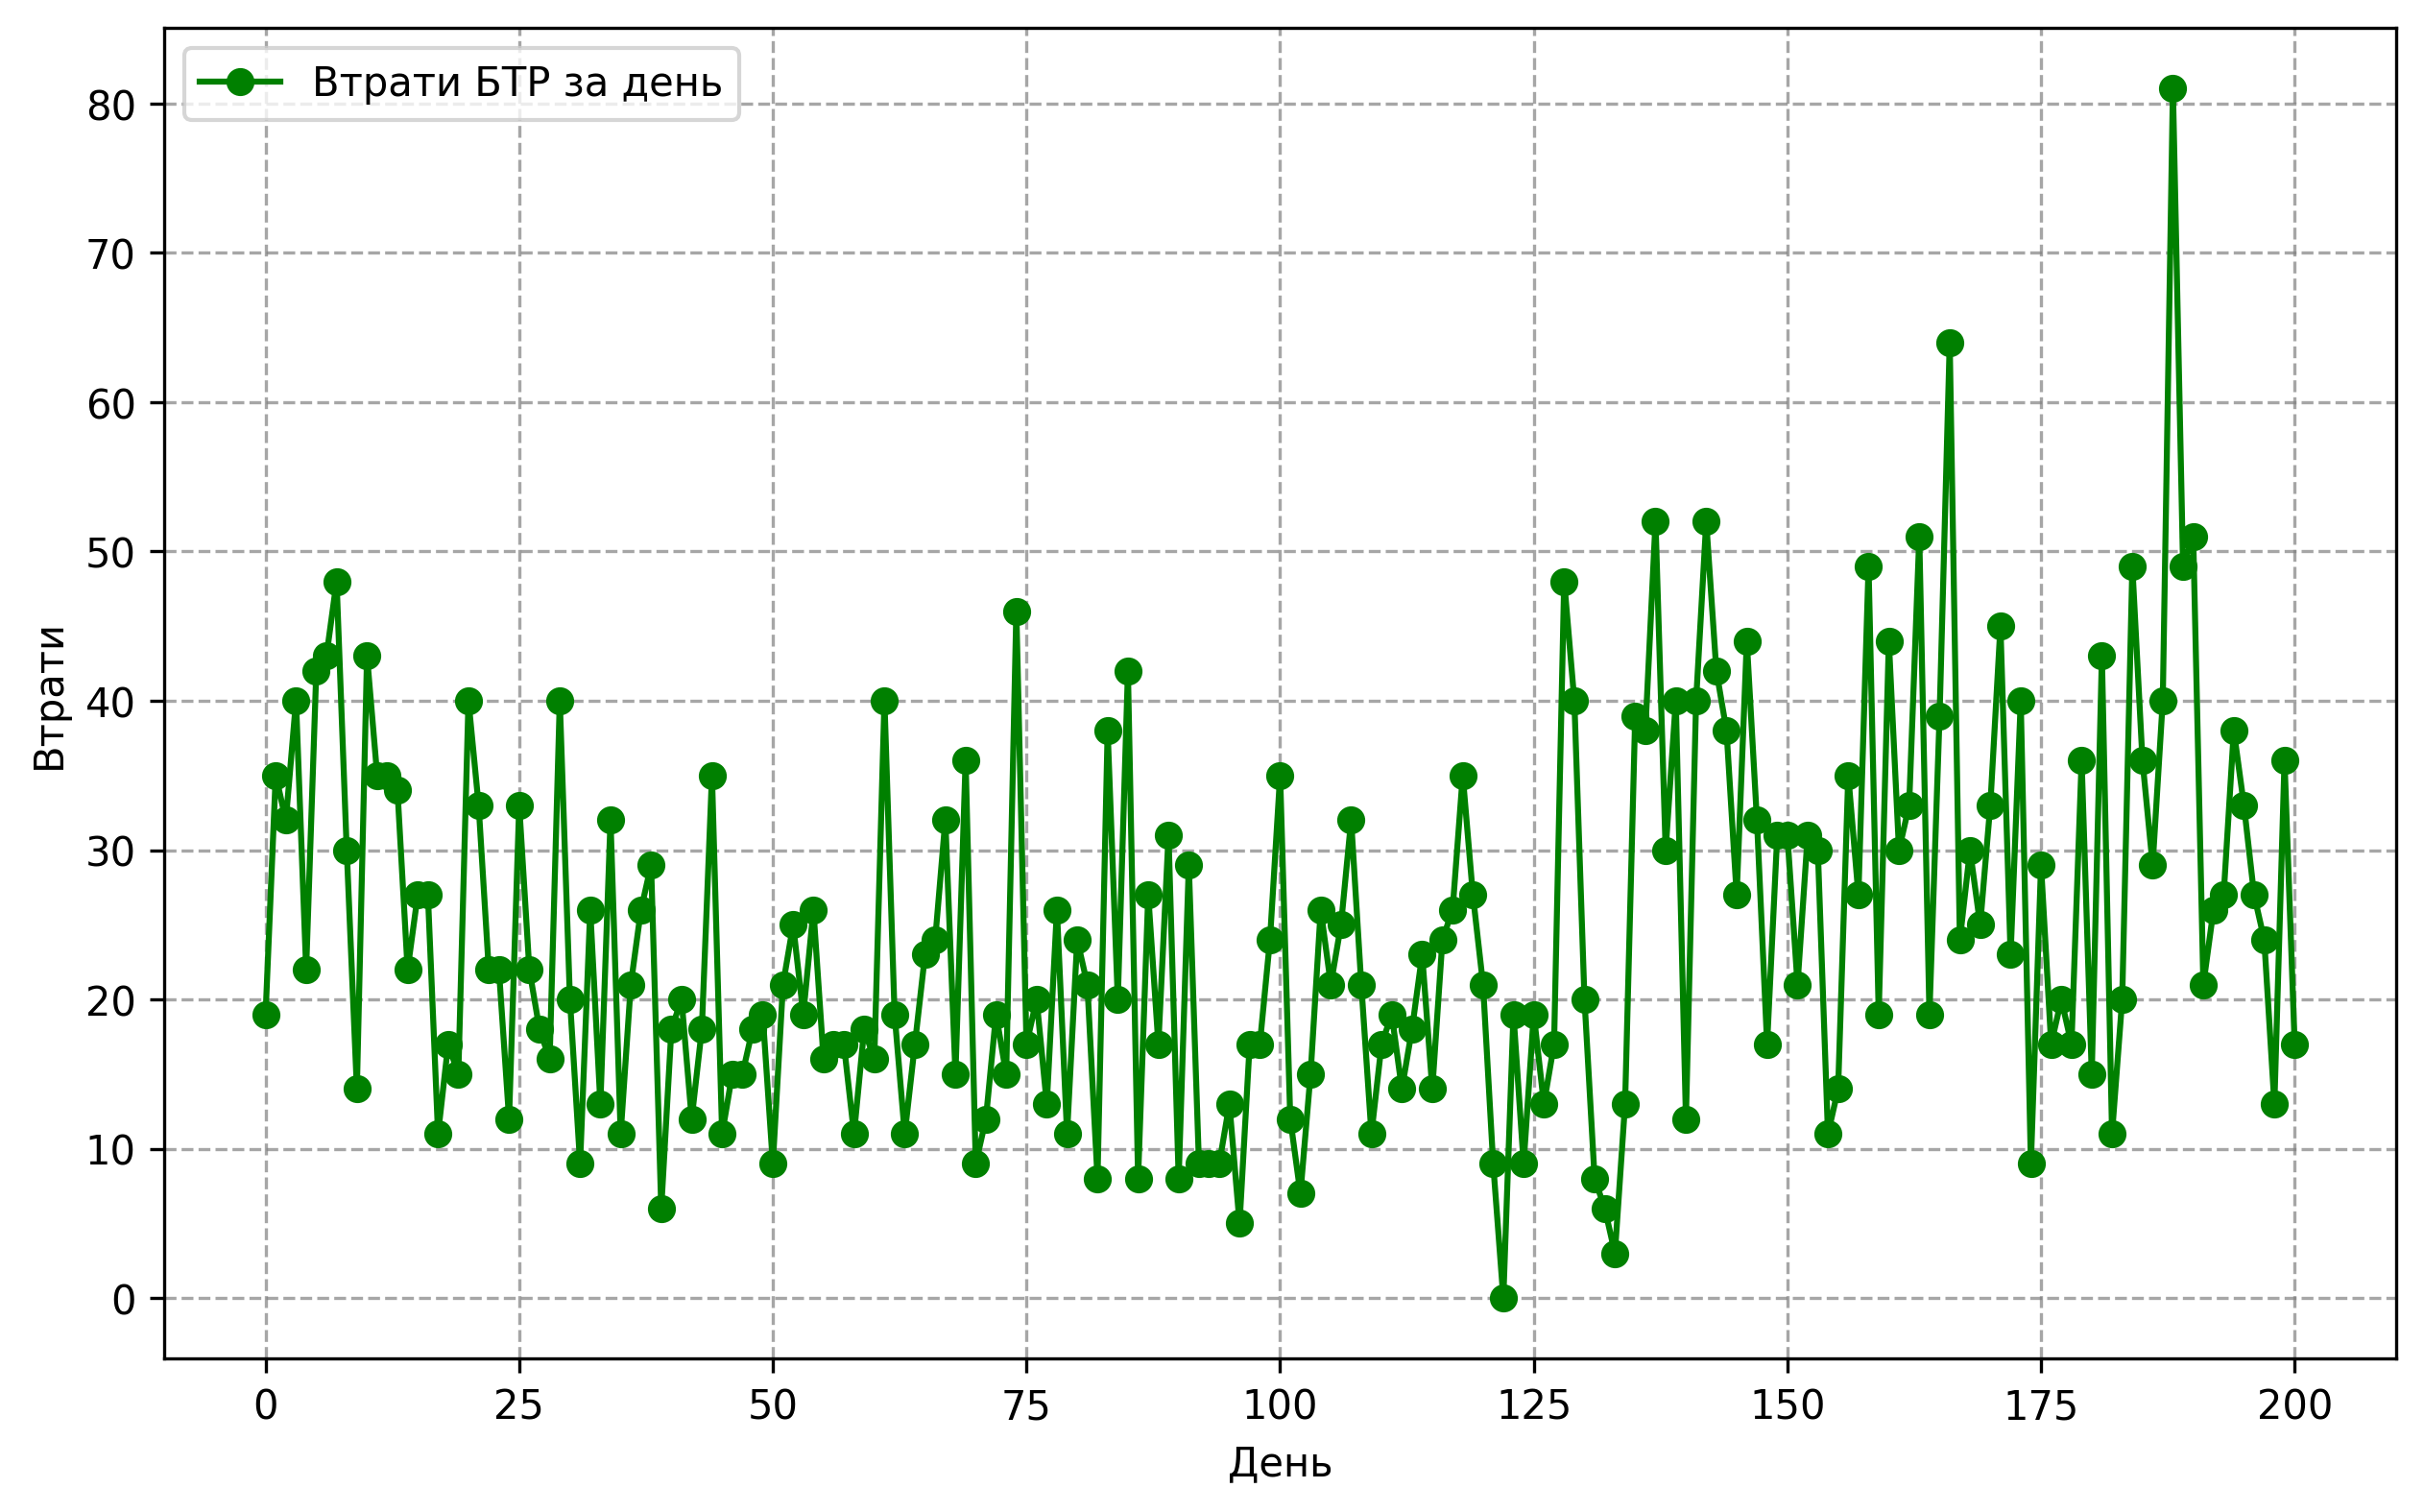

In [69]:
import matplotlib.pyplot as plt

def plot_last_200_days(data):
    recent_losses = data[-201:]
    plt.figure(figsize=(10, 6), dpi=300)
    plt.plot(recent_losses, marker='o', linestyle='-', color='green', label='Втрати БТР за день', linewidth=1.5)
    plt.xlabel('День')
    plt.ylabel('Втрати')
    plt.legend()
    plt.grid(color='grey', linestyle='--', alpha=0.7)
    plt.savefig('apc_losses_200_days.png', dpi=300)
    plt.show()

plot_last_200_days(daily_losses_data)
